In [1]:
from simple_backtester import Backtester
from pathlib import Path
from simple_backtester.utils.yaml_helper import YamlParser

Loading data from ../tests/test_data/data/ccxt/feature/
Possible target features: ['close', 'low', 'bid', 'ask', 'volume']
Error: ['BTC/USD', '1INCH/USD'] at 2022-01-01 02:36:00:2022-01-01 22:18:00 not found in local!
Features not found: ['close']
Fetching data from ccxt...
Backtest complete.
Cumulative PnL: -352.68600000007234
Sharpe Ratio: -0.036303414974437065
Volatility: 13.057733629592049
Max Drawdown: 498.4420000000633
PnL History: [ 1.72700000e+01 -6.04405415e-15  3.39728246e-14  5.51203527e-15
  9.34807787e-15  6.98651137e-14  1.18163257e-13 -5.11800000e+01
  1.97042382e-14 -2.05600000e+01]


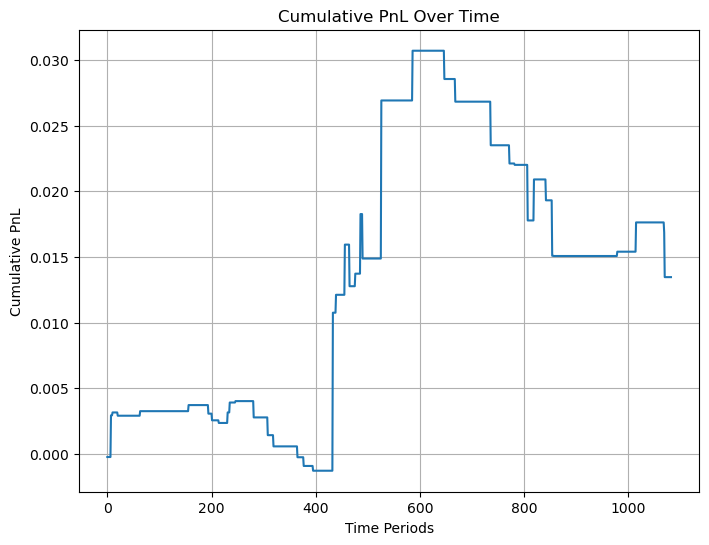

In [2]:
# Load the YAML configuration and the new strategy
strategy_module_path = "../tests/test_data/strategy/strat1.py"
config_path = "../tests/test_data/strategy/strat2.yaml"
# config = yaml.safe_load(Path(config_path).read_text())

# Dynamically load the strategy class
backtest = Backtester(strategy_module_path, config_path)
source = "ccxt"
path = f"../tests/test_data/data/{source}/feature/"
config = {
    "source": source,
    "data_path": path,
    # "tech_indicators": ["ma", "macd", "rsi"],
    "features": [file.name[:-4] for file in Path(path).iterdir() if file.is_file()],
}
backtest.run(config)

# Get and display results
results = backtest.get_results()
print("Cumulative PnL:", results["cumulative_pnl"])
print("Sharpe Ratio:", results["Sharpe Ratio"])
print("Volatility:", results["Volatility"])
print("Max Drawdown:", results["Max Drawdown"])
print("PnL History:", results["pnl_history"][:10])

# Plot the PnL
backtest.plot_pnl()

Loading data from ../tests/test_data/data/local/feature/
Possible target features: ['close', 'price', 'return', 'volume']
Features not found: []
Features not found: []
Loading data from ../tests/test_data/data/local/feature/
Possible target features: ['close', 'price', 'return', 'volume']
Features not found: []
Features not found: []
Loading data from ../tests/test_data/data/local/feature/
Possible target features: ['close', 'price', 'return', 'volume']
Features not found: []
Features not found: []
Loading data from ../tests/test_data/data/local/feature/
Possible target features: ['close', 'price', 'return', 'volume']
Features not found: []
Features not found: []
Loading data from ../tests/test_data/data/local/feature/
Possible target features: ['close', 'price', 'return', 'volume']
Features not found: []
Features not found: []
Loading data from ../tests/test_data/data/local/feature/
Possible target features: ['close', 'price', 'return', 'volume']
Features not found: []
Features not fo

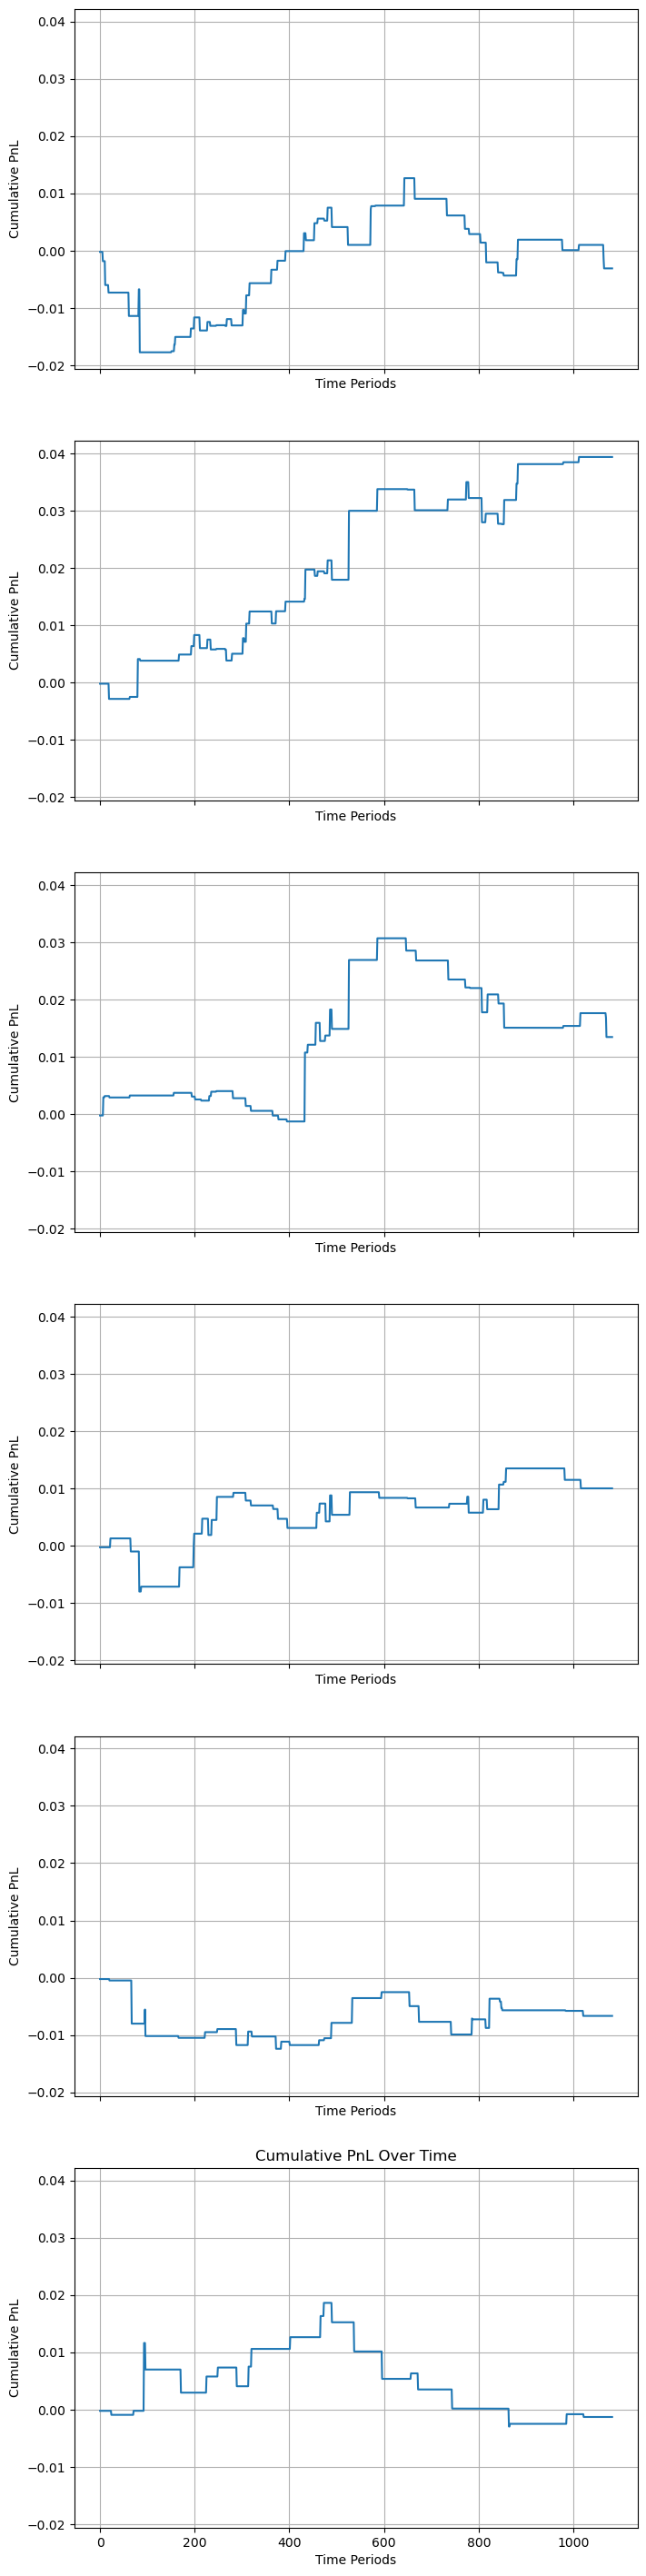

In [5]:
# Load the YAML configuration and the new strategy
strategy_module_path = "../tests/test_data/strategy/strat2.py"
config_path = "../tests/test_data/strategy/strat2.yaml"
# config = yaml.safe_load(Path(config_path).read_text())

# Dynamically load the strategy class
backtest = Backtester(strategy_module_path, config_path)
source = "local"
path = f"../tests/test_data/data/{source}/feature/"
config = {
    "source": source,
    "data_path": path,
    # "tech_indicators": ["ma", "macd", "rsi"],
    "features": [file.name[:-4] for file in Path(path).iterdir() if file.is_file()],
}
backtest.batch_run(config)

# Get and display results
results = backtest.get_results()

backtest.plot_pnl()
